In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
pd.options.display.max_rows = 999

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [4]:
path = 'Mode_train-Model_random_forest-TrainWw_1440-TrainPd_24-TradingStgy_ml_strategy-PeriodsFwTg_48-SL_10-RR_5-UseDaysClose_True'
orders = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'orders.csv'))
wallet = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'wallet.csv'))


In [5]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,e66469d0-2f41-11ef-bfc7-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-06 09:00:00,2023-01-06 13:00:00,1.05127,1.05127,1.05027,-10.000,1.05027,1.05627,10000,-0.001,ClosePositionType.STOP_LOSS
1,e69cafca-2f41-11ef-96d4-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-06 14:00:00,2023-01-06 15:00:00,1.04946,1.04946,1.05446,49.500,1.04846,1.05446,9900,0.005,ClosePositionType.TAKE_PROFIT
2,1ae1ae6e-2f42-11ef-aef5-958c92a01fe8,EURUSD,OperationType.BUY,2023-02-17 15:00:00,2023-02-21 17:00:00,1.06413,1.06413,1.06913,51.975,1.06313,1.06913,10395,0.005,ClosePositionType.TAKE_PROFIT
3,5e68829f-2f42-11ef-88c4-958c92a01fe8,EURUSD,OperationType.BUY,2023-04-17 16:00:00,2023-04-17 17:00:00,1.09322,1.09322,1.09222,-10.915,1.09222,1.09822,10915,-0.001,ClosePositionType.STOP_LOSS
4,608f153b-2f42-11ef-a648-958c92a01fe8,EURUSD,OperationType.BUY,2023-04-19 13:00:00,2023-04-19 14:00:00,1.09338,1.09338,1.09238,-10.806,1.09238,1.09838,10806,-0.001,ClosePositionType.STOP_LOSS
5,60a908ea-2f42-11ef-a14b-958c92a01fe8,EURUSD,OperationType.BUY,2023-04-19 15:00:00,2023-04-21 10:00:00,1.09498,1.09498,1.09398,-10.698,1.09398,1.09998,10698,-0.001,ClosePositionType.STOP_LOSS
6,6b96da4d-2f42-11ef-9a6d-958c92a01fe8,EURUSD,OperationType.BUY,2023-04-28 12:00:00,2023-04-28 14:00:00,1.09881,1.09881,1.09781,-10.591,1.09781,1.10381,10591,-0.001,ClosePositionType.STOP_LOSS
7,6bbcb563-2f42-11ef-819f-958c92a01fe8,EURUSD,OperationType.BUY,2023-04-28 15:00:00,2023-05-01 16:00:00,1.09846,1.09846,1.10346,52.425,1.09746,1.10346,10485,0.005,ClosePositionType.TAKE_PROFIT
8,77a8854b-2f42-11ef-b38f-958c92a01fe8,EURUSD,OperationType.BUY,2023-05-09 16:00:00,2023-05-09 18:00:00,1.09620,1.09620,1.09520,-11.009,1.09520,1.10120,11009,-0.001,ClosePositionType.STOP_LOSS
9,77c965eb-2f42-11ef-b04d-958c92a01fe8,EURUSD,OperationType.BUY,2023-05-09 19:00:00,2023-05-10 00:00:00,1.09553,1.09553,1.09453,-10.899,1.09453,1.10053,10899,-0.001,ClosePositionType.STOP_LOSS


In [6]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [7]:
orders.operation_type.value_counts()

operation_type
OperationType.BUY    41
Name: count, dtype: int64

# Compras que salieron bien

In [8]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.17073170731707318

# Ventas que salieron bien

In [37]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

ZeroDivisionError: division by zero

# Cierres por SL y TP

In [10]:
orders.comment.value_counts()

comment
ClosePositionType.STOP_LOSS      34
ClosePositionType.TAKE_PROFIT     7
Name: count, dtype: int64

In [11]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [12]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Cierres por SL en que se minimizaron las perdidas

In [13]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Desempenio por ticker

In [14]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,EURUSD,7,34,-0.185,17.073171


# Rendimiento por mes

In [15]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.000,1000.000,NaN
0,2023,1,2,1.0,1.0,1.0,1.0,0.500,49.500,39.500,1039.500,0.040
1,2023,2,1,1.0,0.0,1.0,0.0,1.000,51.975,51.975,1091.475,0.050
2,2023,4,4,0.0,4.0,0.0,4.0,0.000,-10.591,-43.010,1048.465,-0.039
3,2023,5,5,1.0,4.0,1.0,4.0,0.200,52.425,9.045,1057.510,0.009
4,2023,7,3,0.0,3.0,0.0,3.0,0.000,-10.365,-31.409,1026.101,-0.030
5,2023,8,9,1.0,8.0,1.0,8.0,0.111,50.285,-31.930,994.171,-0.031
6,2023,9,11,2.0,9.0,2.0,9.0,0.182,49.635,7.108,1001.279,0.007
7,2023,10,5,1.0,4.0,1.0,4.0,0.200,48.090,8.635,1009.914,0.009
8,2023,12,1,0.0,1.0,0.0,1.0,0.000,-10.099,-10.099,999.815,-0.010


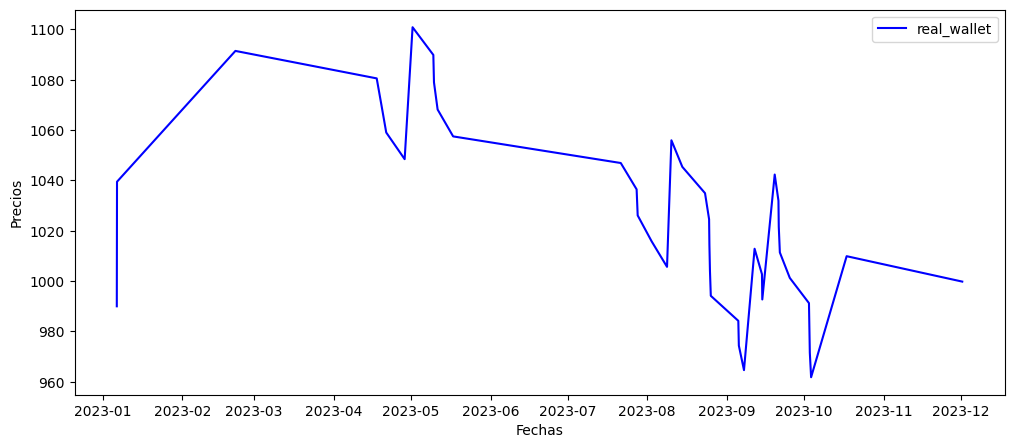

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [17]:
orders_per_month_gb.perc_change.mean()

0.0005555555555555561

In [18]:
orders_per_month_gb.perc_change.std()

0.03120541263591587

In [19]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 5000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.000,5000.000000
1,0.040,5200.000000
2,0.050,5460.000000
3,-0.039,5247.060000
4,0.009,5294.283540
5,-0.030,5135.455034
6,-0.031,4976.255928
7,0.007,5011.089719
8,0.009,5056.189527
9,-0.010,5005.627631


# Rendimiento por dia

In [20]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
1,2023,2,1,1.0,0.0,1.0,0.0,100.0,51.975,51.975,1091.475,0.048


In [21]:
# ticker = 'USDCHF'
# date_from = datetime(2023,1,1)
# date_to = date_from + timedelta(days=15)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label='EURUSD Price', color='blue')
#     plt.plot(historical_prices['Date'], historical_prices['High'], label='EURUSD Price', color='gray', linestyle='dashed')
#     plt.plot(historical_prices['Date'], historical_prices['Low'], label='EURUSD Price', color='gray', linestyle='dashed')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title('EURUSD Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     time.sleep(8)
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [22]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss  profit  tp_cumsum  sl_cumsum  \
year month day                                                         
2023 1     6              1          1  39.500          1          1   
     2     21             1          0  51.975          1          0   
     4     17             0          1 -10.915          0          1   
           19             0          1 -10.806          0          2   
           21             0          1 -10.698          0          3   
           28             0          1 -10.591          0          4   
     5     1              1          0  52.425          1          0   
           9              0          1 -11.009          1          1   
           10             0          1 -10.899          1          2   
           11             0          1 -10.790          1          3   
           17             0          1 -10.682          1          4   
     7     21             0          1 -10.575          0          1   
           27             0          1 -10.469          0          2   
           28             0          1 -10.365          0          3   
     8     2              0          1 -10.261          0          1   
           8              0          1 -10.158          0          2   
           10             1          0  50.285          1          2   
           14             0          1 -10.560          1          3   
           23             0          1 -10.454          1          4   
           25             0          4 -40.782          1          8   
     9     5              0          2 -19.784          0          2   
           7              0          1  -9.744          0          3   
           11             1          0  48.230          1          3   
           14             0          2 -20.156          1          5   
           19             1          0  49.635          2          5   
           21             0          3 -30.959          2          8   
           25             0          1 -10.114          2          9   
     10    2              0          1 -10.013          0          1   
           3              0          3 -29.442          0          4   
           17             1          0  48.090          1          4   
     12    1              0          1 -10.099          0          1   

                profit_cumsum  
year month day                 
2023 1     6           39.500  
     2     21          51.975  
     4     17         -10.915  
           19         -21.721  
           21         -32.419  
           28         -43.010  
     5     1           52.425  
           9           41.416  
           10          30.517  
           11          19.727  
           17           9.045  
     7     21         -10.575  
           27         -21.044  
           28         -31.409  
     8     2          -10.261  
           8          -20.419  
           10          29.866  
           14          19.306  
           23           8.852  
           25         -31.930  
     9     5          -19.784  
           7          -29.528  
           11          18.702  
           14          -1.454  
           19          48.181  
           21          17.222  
           25           7.108  
     10    2          -10.013  
           3          -39.455  
           17           8.635  
     12    1          -10.099

# Que hubiera pasado si no se operaba con algunos tickers?

In [23]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

[]


# Rendimiento por mes

In [24]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change


In [25]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

IndexError: single positional indexer is out-of-bounds

In [ ]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

In [ ]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [26]:
true_values = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'test_res.csv'))

In [27]:
predictions

,y_true,y_pred,proba
0,1.0,1.0,0.524783
1,1.0,1.0,0.527591
2,1.0,1.0,0.515609
3,0.0,0.0,0.506306
4,0.0,0.0,0.510233
...,...,...,...
1918,1.0,1.0,0.525302
1919,1.0,1.0,0.546709
1920,1.0,1.0,0.544616
1921,1.0,1.0,0.525668


In [28]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report


precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.6828864470740634
0.6755070202808112
0.6767435739967679


In [29]:
print(classification_report(predictions['y_true'], predictions['y_pred']))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.69      1080
         1.0       0.61      0.70      0.65       843

    accuracy                           0.68      1923
   macro avg       0.68      0.68      0.67      1923
weighted avg       0.68      0.68      0.68      1923



<Axes: >

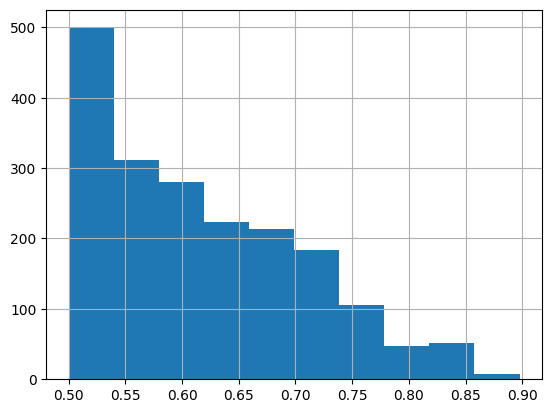

In [30]:
predictions.proba.hist()

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.69      1080
         1.0       0.61      0.70      0.65       843

    accuracy                           0.68      1923
   macro avg       0.68      0.68      0.67      1923
weighted avg       0.68      0.68      0.68      1923

Confusion Matrix
[[710 370]
 [254 589]]


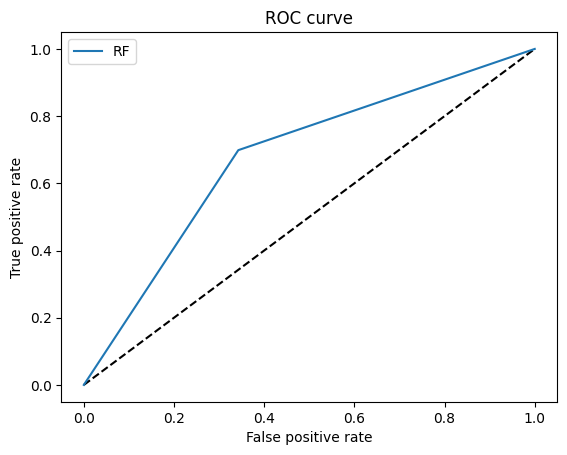

In [31]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [32]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,y_true,y_pred,proba,binary_pred
0,1.0,1.0,0.524783,0.524783
1,1.0,1.0,0.527591,0.527591
2,1.0,1.0,0.515609,0.515609
3,0.0,0.0,0.506306,0.493694
4,0.0,0.0,0.510233,0.489767
...,...,...,...,...
1918,1.0,1.0,0.525302,0.525302
1919,1.0,1.0,0.546709,0.546709
1920,1.0,1.0,0.544616,0.544616
1921,1.0,1.0,0.525668,0.525668


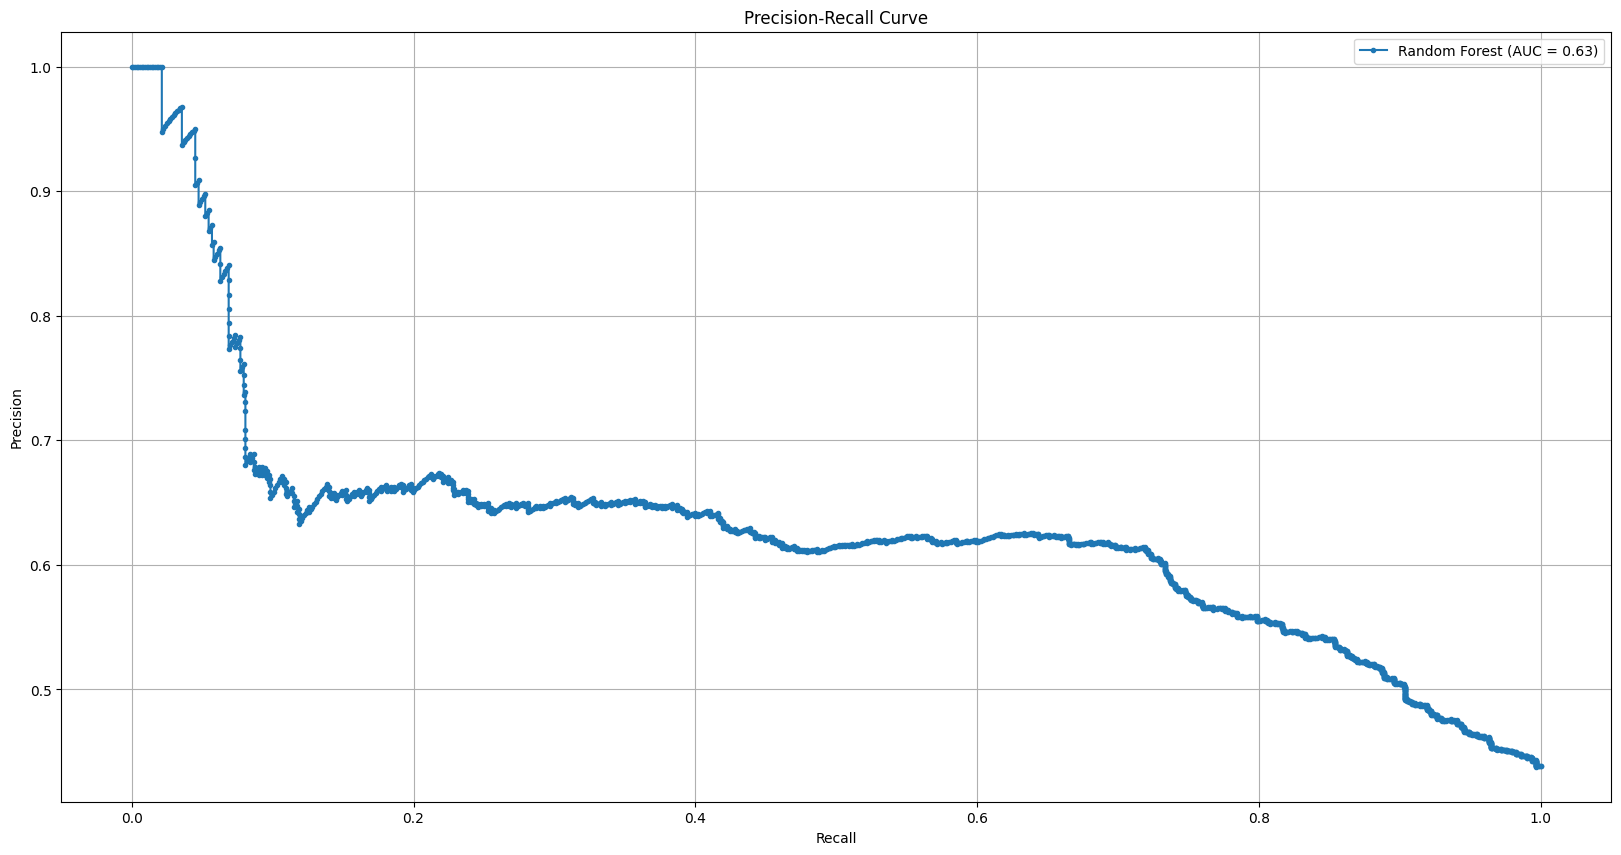

In [36]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [34]:
len(thresholds)

1914

In [35]:
predictions.y_true.value_counts() * 0.01

y_true
0.0    10.80
1.0     8.43
Name: count, dtype: float64

In [ ]:
threshold = 0.85
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
predictions[predictions['proba']>threshold]

In [ ]:
predictions.head(50)

In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()